In [1]:
'''
Block #1
Shift + Enter to load libraries
'''
import numpy as np
import pandas  as pd
from matplotlib import pyplot as plt
import gym
import os
from keras.models import load_model

Using TensorFlow backend.
/Users/zuolinliu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
'''
Block #2
Shift + Enter to load code
'''
def main(render=False, num_epoch=100):
    model = load_model('DQN_Lunar_Lander.h5')
    env = gym.make("LunarLander-v2")
    rewards = []
    for _ in range(num_epoch):
        state = env.reset()
        total_reward = 0
        while True: 
            if render:
                env.render()
            action = np.argmax(model.predict(state.reshape(1, -1)))
            new_state, reward, done, info = env.step(action)
            total_reward += reward

            if done:
                break
            state = new_state
        rewards += [total_reward]
    env.close()
    print("Average reward of 100 testing epochs: ", sum(rewards)/len(rewards))
    plt.plot(rewards)
    plt.ylabel("Testing reward")
    plt.xlabel("Epoch")
    plt.ylim([(min(rewards)//100)*100, (max(rewards)//100+1)*100])
    plt.show()

Average reward of 100 testing epochs:  246.85825583780556


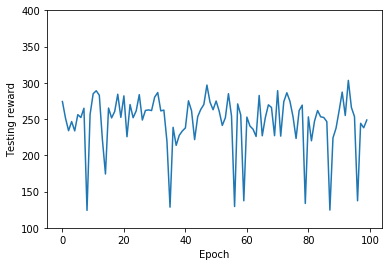

CPU times: user 36.7 s, sys: 2.15 s, total: 38.8 s
Wall time: 35.5 s


In [3]:
'''
Block #3
Shift + Enter to run test the model for 100 episodes
'''
# 100 episodes testing to get the curve
%time main()

Average reward of 100 testing epochs:  257.413670115689


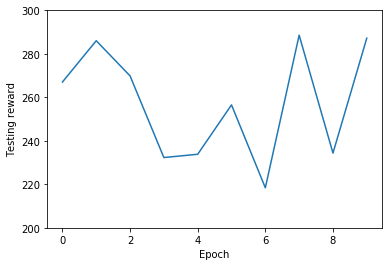

CPU times: user 11.7 s, sys: 1.12 s, total: 12.8 s
Wall time: 50.3 s


In [4]:
'''
Block #4
Shift + Enter to see how the trained agent behaves in the cartoon for 10 episodes
'''
# watch the cartoon of the trained agent behaves for 10 episodes
%time main(render=True, num_epoch=10)